## Final Report Group 7

## Introduction

### Background
Income inequality is an ongoing issue of great public concern in every country, and in the United States, it  has a history substantially older than the country itself (NPR,2016). Racial and ethnic communities in the United States are experiencing significant changes in rising income inequality (Kochhar.R & Cilluffo.A, 2018). There are notable wage gaps among American workers by race (Williams.W,2021). Based on these materials, this report aims to explore the correlation between salary and race which is one factor of income inequality. Digging a little deeper, according to Yahoo News, the top 10% average salaries in USA is roughly $173,000 founded by the Economic Policy Institute(Legate-Wolfe.A,2023).

### Guiding Question
>Is there a *difference in means* of salaries (in USD) between people of `African American` descent and people of `White` descent in the USA? 

### Dataset
In this project we are using the dataset, [“Salary dataset based on country and race”](https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race) which we obtained from Kaggle. This data was collected at random and it includes variables such as `Age`, `Gender`, `Education.level`, `Job.title`, `Years.of.experience`, `Salary`, `Country`, and `Race`. With all the variables form the dataset, we are able to obtain a better scope of pay range in the many job markets.

## Methods and Results

## Preliminary Results
### Reading the Data
Datasets are unable to be read directly from Kaggle. So, the dataset is downloaded to the `Github` repository and read from there.

In [2]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(gridExtra)
library(scales) #Run this first!

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
salary_dataset <- read.csv("https://raw.githubusercontent.com/hongkailiu123/stat201_Group7/main/Salary_Data_Based_country_and_race.csv")
head(salary_dataset)

,X,Age,Gender,Education.Level,Job.Title,Years.of.Experience,Salary,Country,Race
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
2,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
3,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
4,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
5,4,52,Male,Master's,Director,20,200000,USA,Asian
6,5,29,Male,Bachelor's,Marketing Analyst,2,55000,USA,Hispanic


The initial glance at the dataset reveals the inclusion of several types of `Race`. To obtain a more convincing statistical inference result, it is advisable to select the two race types with the *highest* number of observations. Additionally, given that `Country` significantly affects people's `Salary` (for instance, an Asian worker in the USA may earn more than an Asian worker in China for an identical job), it makes sense to focus solely on data collected from one country (with *most* observations!). Let's proceed with data cleaning and wrangling to prepare the data for analysis!"

### Cleaning and Wrangling the Data
Let's see the numbers of observations from different `Country` and numbers of observations for each type of `Race` (tibbles in decreasing orders).

In [4]:
country_counts <- salary_dataset|>
                    filter(!is.na(Salary))|>
                    group_by(Country)|>
                    summarize(n=n())|>
                    arrange(-n)

country_counts

Country,n
<chr>,<int>
USA,1359
China,1343
Australia,1336
UK,1336
Canada,1325


The summary tibble (country_counts) suggests us to work with the observations from *USA*.

In [5]:
salary_race_USA <- salary_dataset|>
                filter(Country == "USA" & !is.na(Salary))|>  #only keep observations from USA
                select(Salary, Race)

race_counts <- salary_race_USA|> #making a counts summary tibble
                group_by(Race)|>
                summarize(n=n())|>
                arrange(-n)

race_counts

Race,n
<chr>,<int>
African American,354
White,347
Asian,336
Hispanic,322


All samples of different race are large enough for us to work with (n > 30 means we can apply the Centrual Limit Theorem to them). In the following analysis, we will foucs on the largest two samples, *African American* and *White*, salaries data from *USA*. 

Since we are only investigating the salaries of USA people with *African American* or *White* descent, Let's sample the data to our needs.

In [12]:
salary_sample <- salary_race_USA|> 
                filter(Race == "White" | Race == "African American")

### Plots
#### Salary Sample Distributions
We will begin by visualizing the salary sample distributions of African American and White Races

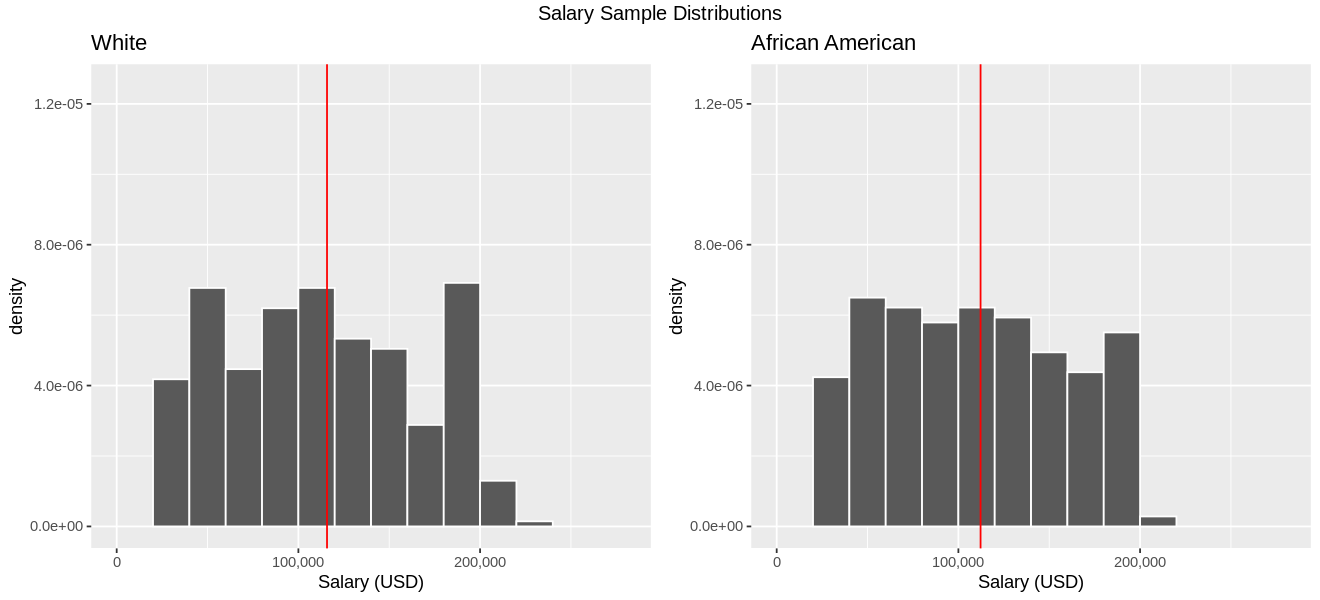

In [7]:
options(repr.plot.width = 11, repr.plot.height = 5) # setting dimensions

white_dist <- salary_race_USA %>% # White sample distribution
    filter(Race == "White") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 20000, boundary = 100000 , color = "white") +
    geom_vline(xintercept = mean(white_sample$Salary),
              color = "red") +
    labs(x = "Salary (USD)", title = "White") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # setting to a constant x axis


african_american_dist <- salary_race_USA %>%  # African American sample distribution
    filter(Race == "African American") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 20000, boundary = 100000 , color = "white") +
    geom_vline(xintercept = mean(african_american_sample$Salary),
              color = "red") +
    labs(x = "Salary (USD)", title = "African American") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # setting to a constant x axis

grid.arrange(white_dist, african_american_dist, ncol = 2, top = "Salary Sample Distributions")

These are sample distributions for how African American and White people are paid in salary. As we can see, both the Asian and White distributions are roughly symmetric about its means. Let's look at the more direct difference in numbers.

### Estimates

In [8]:
race_sal_estimates <- salary_race_USA %>%
                        filter(Race == "African American" | Race == "White" )|>
                        group_by(Race) %>%
                        summarize(n = n(),
                                  mean_salary = mean(Salary),
                                  sd_salary = sd(Salary))

race_sal_estimates

Race,n,mean_salary,sd_salary
<chr>,<int>,<dbl>,<dbl>
African American,354,112209.7,50610.19
White,347,115763.8,53376.88


In this tibble, we have the columns n, mean_salary, and sd_salary. The **n** colum represents the number of observations we have per race in our sample. The **Mean Salary** column represents the Mean Salary in USD for each race and the **SD Salary** column represents the spread in the salary distribution.

From the point estimates, we can see there is indeed a difference in means of salaries around 3500 USD. The mean salary for White workers is higher than African American workers in USA. 

In the preliminary results, we observed a difference in means of salaries between the samples of African American workers and White workers, with an initial estimate of approximately *3500 USD*. Unfortunately, the point estimates do not provide information about the precision or uncertainty of the estimate, as different samples from the same population can yield varying results due to sampling variability.


To obtain more reliable and robust results, our plan is to analyze the two samples using both Confidence Intervals and Hypothesis Tests.


Since both samples are large enough (n > 30), representative, unbiased, and drawn from two independent populations, any results based on these samples can be generalized to the populations.

We will conduct a hypothesis test on the difference in means ( $\mu_1$ - $\mu_2$) at a 0.1% level of significance (α = 0.001). 
where $\mu_1$ represents the mean salary of all African American workers, and $\mu_2$ epresents the mean salary of all White workers in the USA. The reason why we pick such a low significance level is because there is a lower chance that the p value is less than the significance level and there is a lower chance that we reject the null hypothesis in favour of the alternative hypothesis. So, we will only reject the null hypothesis that there is no difference in mean salary for all White and African American people in the US, only if we have quite strong evidence. Additionally, we will include two 90% confidence intervals in the final report.



At this time, we can set $H_0$ and $H_1$ for the following hypotheses:

<center>$H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 \neq 0$</center>

where $H_0$ means no *difference in means* of salaries (in USD) between people of `African American` descent and people of `White` descent in the USA, while $H_1$ means there is.


Based on the preliminary point estimate results, we anticipate rejecting the null hypothesis ($H_0$) in favor of the alternative hypothesis ($H_1$), indicating that there is a significant difference in means of salaries between the two racial groups in the USA.

### Hypothesis Test

In [18]:
set.seed(3)

null_dist <- salary_sample %>%
        specify(formula = Salary ~ Race) %>%
        hypothesize(null = "independence") %>%
        generate(reps = 1000, type = "permute") %>%
        calculate(stat = "diff in means", order = c("White", "African American"))

head(null_dist)

replicate,stat
<int>,<dbl>
1,3176.054
2,-7398.245
3,2898.075
4,-6457.826
5,1308.427
6,-4676.090


In [19]:
obs_diff_means <- salary_sample %>% 
  specify(formula = Salary ~ Race) %>% 
  calculate(stat = "diff in means", order = c("White", "African American"))
obs_diff_means

stat
<dbl>
3554.134


In [22]:
p_val <- null_dist %>% 
          get_p_value(obs_stat = obs_diff_means, direction = "both")
p_val

p_value
<dbl>
0.356


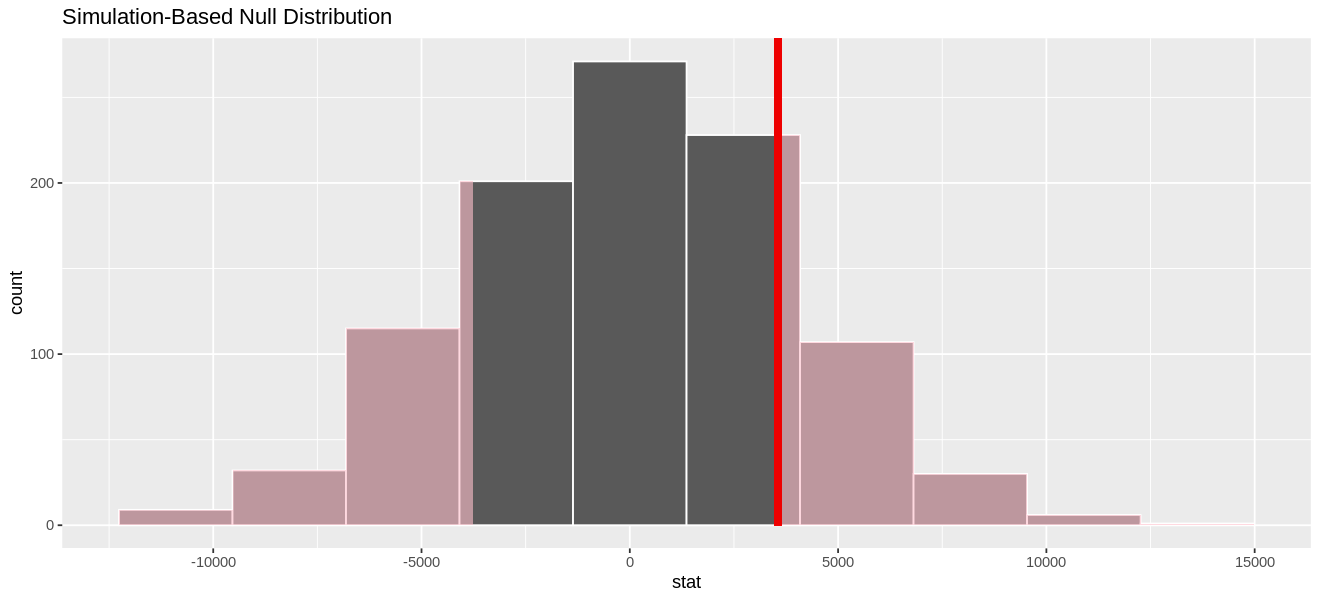

In [20]:
p_val_dist <- visualize(null_dist, bins = 10) + 
              shade_p_value(obs_stat = obs_diff_means, direction = "both")
p_val_dist

Since our p value is larger than our specified significance level of 0.05, we fail to reject our null hypothesis that $H_0: \mu_1 - \mu_2 = 0$. We do not have the evidence needed in this sample of data to suggest that there is no difference in salary between White and African American Races in America. Furthermore, we cannot say that a difference exists in salary between White and African American races, on average, for all people in the US.

## Discussion

## References

Kochhar.R & Cilluffo.A, 2018. Income Inequality in the U.S is rising most rapidly among Asians\
https://www.pewresearch.org/social-trends/2018/07/12/income-inequality-in-the-u-s-is-rising-most-rapidly-among-asians/ \
Legate-Wolfe.A,2023. Kochhar.R & Cilluffo.A, 2018. Income Inequality in the U.S is rising most rapidly among Asians
https://www.pewresearch.org/social-trends/2018/07/12/income-inequality-in-the-u-s-is-rising-most-rapidly-among-asians/
Legate-Wolfe.A,2023. How much do I need to make to be in the top 1%, 5%, and 10% in the US? It's probably less than you think https://finance.yahoo.com/news/much-money-top-1-5-100000529.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGZBEXN1TT-flYembR2n7lJg7hYbx0lznAeQYejaRI_trs4J9huxmVAhmb6CyZTO9yTNE1VFvLYPJh6BBKLH_EKO0k9GHE3D8YXBhH6tEW9LCNUmctadMk8AiFU9BgWXcaV1Y8219Ix_ouKofgWOUFHKWfaCPxT9P1bEeu87HTiD NPR.(2016) Forgotten History: How the New England Colonists Embraced the Slave Trade
https://www.npr.org/2016/06/21/482874478/forgotten-history-how-the-new-england-colonists-embraced-the-slave-trade
Williams.W,2021. Wage gaps by race.
https://www.investopedia.com/wage-gaps-by-race-5073258#citation-31
Sudheer.P, 2023. Salary dataset based on country and race
https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-raceHow much do I need to make to be in the top 1%, 5%, and 10% in the US? It's probably less than you think
https://finance.yahoo.com/news/much-money-top-1-5-100000529.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGZBEXN1TT-flYembR2n7lJg7hYbx0lznAeQYejaRI_trs4J9huxmVAhmb6CyZTO9yTNE1VFvLYPJh6BBKLH_EKO0k9GHE3D8YXBhH6tEW9LCNUmctadMk8AiFU9BgWXcaV1Y8219Ix_ouKofgWOUFHKWfaCPxT9P1bEeu87HTiD
NPR.(2016) Forgotten History: How the New England Colonists Embraced the Slave Trade\
https://www.npr.org/2016/06/21/482874478/forgotten-history-how-the-new-england-colonists-embraced-the-slave-trade \
Williams.W,2021. Wage gaps by race.\
https://www.investopedia.com/wage-gaps-by-race-5073258#citation-31 \
Sudheer.P, 2023. Salary dataset based on country and race \
https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race